Linear Regression is used to model the relationship between two variables by fitting a linear equation to given data where one variable is explanatory variable and the other is a dependent variable. Multiple linear Regression uses many such explanatory variables to predict the outcome of a target variable i.e two or more independent variables and one dependent variable.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (15, 10)

### Load the Data

In [2]:
ad = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/data32.csv')
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Relationships between Features and Target

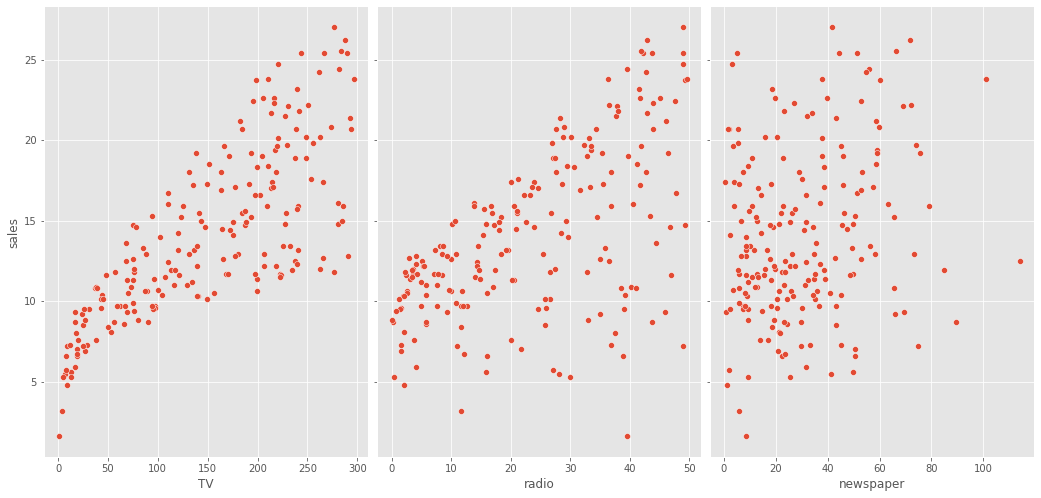

In [3]:
sns.pairplot(ad,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

In [4]:
from sklearn.linear_model import LinearRegression
X= ad[['TV','radio','newspaper']]
y=ad.sales
l = LinearRegression()
l.fit(X,y)
print(l.intercept_)
print(l.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [5]:
list(zip(['TV','radio','newspaper'], l.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

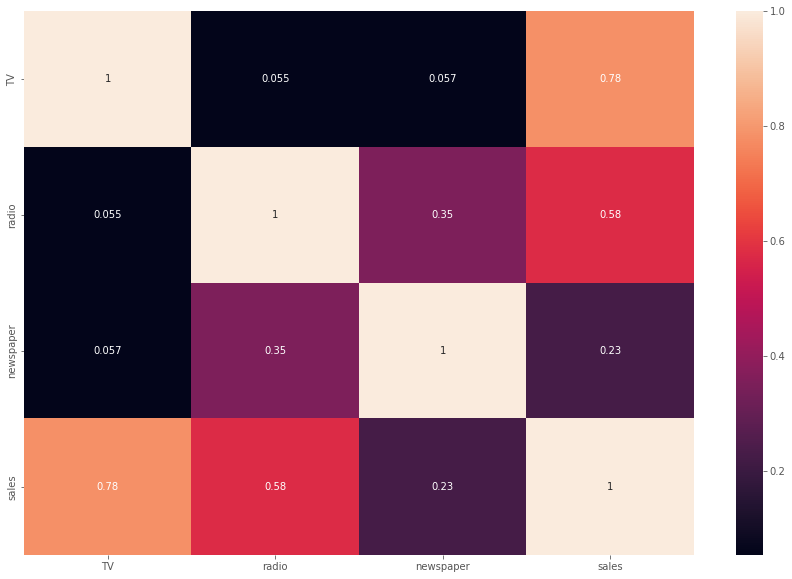

In [6]:
sns.heatmap(ad.corr(),annot=True)

### Feature Selection

In [7]:
from sklearn.metrics import r2_score
l2=LinearRegression().fit(X[['TV','radio']],y)
l2_preds = l2.predict(X[['TV','radio']])
print('R^2 score',r2_score(y,l2_preds))

R^2 score 0.8971942610828957


In [8]:
l3=LinearRegression().fit(X[['TV','radio','newspaper']],y)
l3_preds = l3.predict(X[['TV','radio','newspaper']])
print('R^2 score',r2_score(y,l3_preds))

R^2 score 0.8972106381789522


### Evaluation Using Train/Test Split & Model Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors

Mean Squared Error (MSE) is the mean of the squared errors

Root Mean Squared Error (RMSE) is the mean of the squared errors

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X= ad[['TV','radio','newspaper']]
y= ad.sales
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
l4 =LinearRegression().fit(X_train,y_train)
l4_preds = l4.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,l4_preds)))
print("R^2:", r2_score(y_test,l4_preds))

RMSE 1.404651423032895
R^2: 0.9156213613792232


In [10]:
X= ad[['TV','radio']]
y= ad.sales
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
l5 =LinearRegression().fit(X_train,y_train)
l5_preds = l5.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,l5_preds)))
print("R^2:", r2_score(y_test,l5_preds))

RMSE 1.3879034699382888
R^2: 0.9176214942248907


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


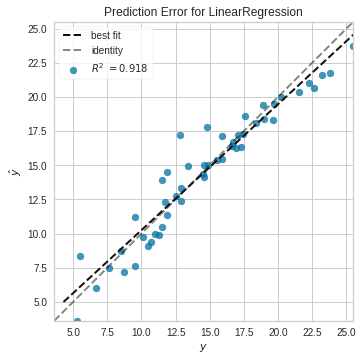

In [11]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
v = PredictionError(l5).fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()